In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets'

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [3]:
greentaxidf=pd.read_csv("NYC Green Taxi June 2022.csv",
                       low_memory=False)

In [4]:
greentaxidf.shape

(73718, 20)

In [5]:
greentaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VendorID(Int64)                73718 non-null  int64  
 1   lpep_pickup_datetime(Int64)    73718 non-null  float64
 2   lpep_dropoff_datetime(Int64)   73718 non-null  float64
 3   store_and_fwd_flag(String)     64436 non-null  object 
 4   RatecodeID(Double)             64436 non-null  float64
 5   PULocationID(Int64)            73718 non-null  int64  
 6   DOLocationID(Int64)            73718 non-null  int64  
 7   passenger_count(Double)        64436 non-null  float64
 8   trip_distance(Double)          73718 non-null  float64
 9   fare_amount(Double)            73718 non-null  float64
 10  extra(Double)                  73718 non-null  float64
 11  mta_tax(Double)                73718 non-null  float64
 12  tip_amount(Double)             73718 non-null 

In [6]:
greentaxidf.columns

Index(['VendorID(Int64)', 'lpep_pickup_datetime(Int64)',
       'lpep_dropoff_datetime(Int64)', 'store_and_fwd_flag(String)',
       'RatecodeID(Double)', 'PULocationID(Int64)', 'DOLocationID(Int64)',
       'passenger_count(Double)', 'trip_distance(Double)',
       'fare_amount(Double)', 'extra(Double)', 'mta_tax(Double)',
       'tip_amount(Double)', 'tolls_amount(Double)', 'ehail_fee(Int32)',
       'improvement_surcharge(Double)', 'total_amount(Double)',
       'payment_type(Double)', 'trip_type(Double)',
       'congestion_surcharge(Double)'],
      dtype='object')

In [7]:
greentaxidf=greentaxidf.drop('ehail_fee(Int32)',axis=1)

In [8]:
# Remove Datatype in paranthesis from Column Name
greentaxidf.columns=greentaxidf.columns.str.replace(
    r"\(.*\) ?","")               

/var/folders/r3/dbt2z1y15j5_krgqpzp7j_pc0000gn/T/ipykernel_4756/2950448171.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  greentaxidf.columns=greentaxidf.columns.str.replace(


In [9]:
greentaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               73718 non-null  int64  
 1   lpep_pickup_datetime   73718 non-null  float64
 2   lpep_dropoff_datetime  73718 non-null  float64
 3   store_and_fwd_flag     64436 non-null  object 
 4   RatecodeID             64436 non-null  float64
 5   PULocationID           73718 non-null  int64  
 6   DOLocationID           73718 non-null  int64  
 7   passenger_count        64436 non-null  float64
 8   trip_distance          73718 non-null  float64
 9   fare_amount            73718 non-null  float64
 10  extra                  73718 non-null  float64
 11  mta_tax                73718 non-null  float64
 12  tip_amount             73718 non-null  float64
 13  tolls_amount           73718 non-null  float64
 14  improvement_surcharge  73718 non-null  float64
 15  to

In [10]:
greentaxidf.isnull().sum().sort_values(ascending=False)

trip_type                9283
congestion_surcharge     9282
store_and_fwd_flag       9282
RatecodeID               9282
payment_type             9282
passenger_count          9282
mta_tax                     0
total_amount                0
improvement_surcharge       0
tolls_amount                0
tip_amount                  0
VendorID                    0
extra                       0
lpep_pickup_datetime        0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
fare_amount                 0
dtype: int64

In [11]:
greentaxidf.trip_type.value_counts(dropna=False)

1.0    61437
NaN     9283
2.0     2998
Name: trip_type, dtype: int64

In [12]:
greentaxidf.trip_type=greentaxidf.trip_type.fillna(1.0)

In [13]:
greentaxidf.congestion_surcharge.describe()

count    64436.000000
mean         0.740933
std          1.220242
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [14]:
greentaxidf.congestion_surcharge=greentaxidf.congestion_surcharge.fillna(0)

In [15]:
greentaxidf.store_and_fwd_flag.value_counts(dropna=False)

N      63638
NaN     9282
Y        798
Name: store_and_fwd_flag, dtype: int64

In [16]:
greentaxidf.store_and_fwd_flag=greentaxidf.store_and_fwd_flag.fillna('N')

In [17]:
greentaxidf.payment_type.value_counts(dropna=False)

1.0    41339
2.0    22700
NaN     9282
3.0      326
4.0       69
5.0        2
Name: payment_type, dtype: int64

In [18]:
greentaxidf.payment_type=greentaxidf.payment_type.fillna(1.0)

In [19]:
greentaxidf.passenger_count.describe()

count    64436.000000
mean         1.283723
std          0.909935
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: passenger_count, dtype: float64

In [20]:
greentaxidf.passenger_count=greentaxidf.passenger_count.fillna(1.0)

In [21]:
greentaxidf.RatecodeID.value_counts(dropna=False)

1.0     60611
NaN      9282
5.0      3429
2.0       281
4.0        65
3.0        49
99.0        1
Name: RatecodeID, dtype: int64

In [22]:
greentaxidf.RatecodeID=greentaxidf.RatecodeID.fillna(1.0)

In [23]:
greentaxidf.head()

VendorID  lpep_pickup_datetime  lpep_dropoff_datetime store_and_fwd_flag  \
0         2          1.654040e+15           1.654040e+15                  N   
1         2          1.654050e+15           1.654050e+15                  N   
2         2          1.654040e+15           1.654040e+15                  N   
3         2          1.654040e+15           1.654040e+15                  N   
4         2          1.654040e+15           1.654040e+15                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           134           216              2.0           2.03   
1         1.0           134           216              2.0           4.26   
2         5.0            53            53              1.0           0.00   
3         1.0            65            17              1.0           1.78   
4         1.0            41           159              3.0           3.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          7.5    0.5      0.5        2.64           0.0   
1         14.5    0.5      0.5        3.16           0.0   
2         15.0    0.0      0.0        4.59           0.0   
3          9.5    0.5      0.5        1.00           0.0   
4         13.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3         11.44           1.0        1.0   
1                    0.3         18.96           1.0        1.0   
2                    0.3         19.89           1.0        2.0   
3                    0.3         11.80           1.0        1.0   
4                    0.3         14.30           2.0        1.0   

   congestion_surcharge  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [25]:
greentaxidf.lpep_pickup_datetime=greentaxidf.lpep_pickup_datetime.astype('int64')/10**6

In [26]:
greentaxidf['pickup']=pd.to_datetime(greentaxidf.lpep_pickup_datetime,
                                    unit='s')

In [28]:
greentaxidf.lpep_dropoff_datetime=greentaxidf.lpep_dropoff_datetime.astype('int64')/10**6

In [29]:
greentaxidf['dropoff']=pd.to_datetime(greentaxidf.lpep_dropoff_datetime,
                                     unit='s')

In [30]:
greentaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73718 non-null  int64         
 1   lpep_pickup_datetime   73718 non-null  float64       
 2   lpep_dropoff_datetime  73718 non-null  float64       
 3   store_and_fwd_flag     73718 non-null  object        
 4   RatecodeID             73718 non-null  float64       
 5   PULocationID           73718 non-null  int64         
 6   DOLocationID           73718 non-null  int64         
 7   passenger_count        73718 non-null  float64       
 8   trip_distance          73718 non-null  float64       
 9   fare_amount            73718 non-null  float64       
 10  extra                  73718 non-null  float64       
 11  mta_tax                73718 non-null  float64       
 12  tip_amount             73718 non-null  float64       
 13  t

In [31]:
greentaxidf.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup',
       'dropoff'],
      dtype='object')

In [32]:
greentaxidf=greentaxidf.drop(['VendorID', 'lpep_pickup_datetime', 
                              'lpep_dropoff_datetime',
                             'PULocationID', 'DOLocationID'],axis=1)

In [33]:
greentaxidf.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'pickup', 'dropoff'],
      dtype='object')

In [34]:
greentaxidf['weekday']=greentaxidf.dropoff.dt.weekday

In [35]:
greentaxidf.weekday.value_counts()

3    13257
2    12973
4    11013
1    10076
0     9307
5     8974
6     8118
Name: weekday, dtype: int64

In [36]:
greentaxidf=greentaxidf.drop(['pickup', 'dropoff'],axis=1)

In [37]:
greentaxidf.total_amount.groupby(greentaxidf.trip_type).mean()

trip_type
1.0    19.140102
2.0    35.195824
Name: total_amount, dtype: float64

In [38]:
# Test Null Average total_amount of different trip type equal
type1=greentaxidf[greentaxidf.trip_type==1.0]
type2=greentaxidf[greentaxidf.trip_type==2.0]

In [39]:
from scipy.stats import ttest_ind

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [40]:
ttest_ind(type1.total_amount,type2.total_amount,equal_var=False)
# Since pvalue=1.9400485137117117e-148 is less than 0.05,
# Reject Null
# Null - No Significant difference in Average total amount of
# different trip_type

Ttest_indResult(statistic=-27.448830837137713, pvalue=1.9400485137117117e-148)

In [41]:
# Test Null Average total_amount of different weekday equal
greentaxidf.total_amount.groupby(greentaxidf.weekday).mean()

weekday
0    19.344095
1    19.464185
2    19.494443
3    19.769369
4    20.319223
5    19.972375
6    20.319885
Name: total_amount, dtype: float64

<AxesSubplot:xlabel='weekday'>

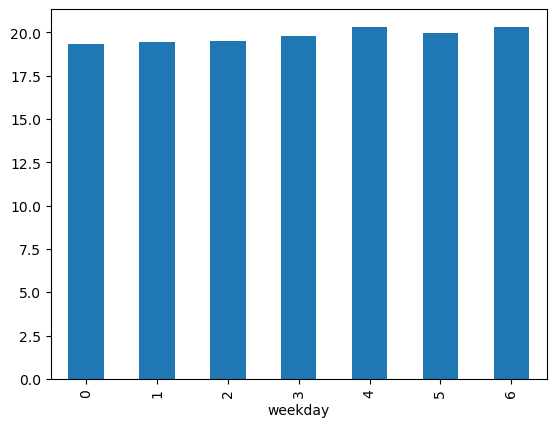

In [42]:
greentaxidf.total_amount.groupby(greentaxidf.weekday).mean().plot(kind='bar')

In [43]:
wd0=greentaxidf[greentaxidf.weekday==0]
wd1=greentaxidf[greentaxidf.weekday==1]
wd2=greentaxidf[greentaxidf.weekday==2]
wd3=greentaxidf[greentaxidf.weekday==3]
wd4=greentaxidf[greentaxidf.weekday==4]
wd5=greentaxidf[greentaxidf.weekday==5]
wd6=greentaxidf[greentaxidf.weekday==6]

In [44]:
from scipy.stats import f_oneway

In [45]:
f_oneway(wd0.total_amount,wd1.total_amount,wd2.total_amount,
        wd3.total_amount,wd4.total_amount,wd5.total_amount,
        wd6.total_amount)
# Since pvalue=1.7369676245639055e-06 is less than 0.05,
# Reject Null. Difference in means is statistically significant

F_onewayResult(statistic=6.17312825836052, pvalue=1.7369676245639055e-06)

In [46]:
pd.crosstab(greentaxidf.weekday,greentaxidf.payment_type)

payment_type   1.0   2.0  3.0  4.0  5.0
weekday                                
0             6378  2869   51    9    0
1             6951  3079   33   13    0
2             8880  4021   59   13    0
3             9079  4113   55    9    1
4             7537  3420   49    7    0
5             6114  2821   33    6    0
6             5682  2377   46   12    1

In [47]:
from scipy.stats import chi2_contingency

In [48]:
chi2_contingency(pd.crosstab(greentaxidf.weekday,
                             greentaxidf.payment_type))
# Since p-value=0.11511 is greater than 0.05, Fail to Reject 
# Null.

(32.498186515150216,
 0.1151122129771573,
 24,
 array([[6.39097164e+03, 2.86590656e+03, 4.11579533e+01, 8.71134594e+00,
         2.52502781e-01],
        [6.91903193e+03, 3.10270490e+03, 4.45586695e+01, 9.43112944e+00,
         2.73366071e-01],
        [8.90835662e+03, 3.99477875e+03, 5.73699504e+01, 1.21427196e+01,
         3.51962886e-01],
        [9.10337498e+03, 4.08223093e+03, 5.86258716e+01, 1.24085434e+01,
         3.59667924e-01],
        [7.56245521e+03, 3.39123552e+03, 4.87023251e+01, 1.03081608e+01,
         2.98787270e-01],
        [6.16230573e+03, 2.76336580e+03, 3.96853414e+01, 8.39965816e+00,
         2.43468352e-01],
        [5.57450389e+03, 2.49977753e+03, 3.58998888e+01, 7.59844271e+00,
         2.20244716e-01]]))

In [49]:
greentaxidf.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'weekday'],
      dtype='object')

In [50]:
objectcols=greentaxidf[['store_and_fwd_flag', 'RatecodeID',
                       'payment_type', 'trip_type','weekday']]

In [51]:
numericcols=greentaxidf.drop(['store_and_fwd_flag', 'RatecodeID',
                       'payment_type', 'trip_type','weekday'],
                            axis=1)

In [52]:
print(greentaxidf.shape)
print(objectcols.shape)
print(numericcols.shape)

(73718, 15)
(73718, 5)
(73718, 10)


In [53]:
objectcolsdummy=pd.get_dummies(objectcols,columns=['store_and_fwd_flag', 'RatecodeID',
                       'payment_type', 'trip_type','weekday'])

In [54]:
print(objectcolsdummy.shape)

(73718, 22)


In [55]:
numericcols.corr()

passenger_count  trip_distance  fare_amount     extra  \
passenger_count               1.000000      -0.008140    -0.020953  0.022470   
trip_distance                -0.008140       1.000000     0.012262 -0.014962   
fare_amount                  -0.020953       0.012262     1.000000 -0.062303   
extra                         0.022470      -0.014962    -0.062303  1.000000   
mta_tax                       0.079477      -0.060035    -0.272656  0.247415   
tip_amount                   -0.006853       0.011230     0.367894  0.015246   
tolls_amount                 -0.012778       0.007765     0.376367 -0.045126   
improvement_surcharge        -0.010232       0.002299     0.058836  0.060589   
total_amount                 -0.017722       0.012258     0.971591 -0.017160   
congestion_surcharge          0.042872      -0.015484     0.029529  0.296072   

                        mta_tax  tip_amount  tolls_amount  \
passenger_count        0.079477   -0.006853     -0.012778   
trip_distance         -0.060035    0.011230      0.007765   
fare_amount           -0.272656    0.367894      0.376367   
extra                  0.247415    0.015246     -0.045126   
mta_tax                1.000000   -0.229737     -0.112607   
tip_amount            -0.229737    1.000000      0.260029   
tolls_amount          -0.112607    0.260029      1.000000   
improvement_surcharge  0.264013    0.029020     -0.001788   
total_amount          -0.268623    0.552500      0.459581   
congestion_surcharge   0.229166    0.125870     -0.059300   

                       improvement_surcharge  total_amount  \
passenger_count                    -0.010232     -0.017722   
trip_distance                       0.002299      0.012258   
fare_amount                         0.058836      0.971591   
extra                               0.060589     -0.017160   
mta_tax                             0.264013     -0.268623   
tip_amount                          0.029020      0.552500   
tolls_amount                       -0.001788      0.459581   
improvement_surcharge               1.000000      0.067777   
total_amount                        0.067777      1.000000   
congestion_surcharge                0.046147      0.118610   

                       congestion_surcharge  
passenger_count                    0.042872  
trip_distance                     -0.015484  
fare_amount                        0.029529  
extra                              0.296072  
mta_tax                            0.229166  
tip_amount                         0.125870  
tolls_amount                      -0.059300  
improvement_surcharge              0.046147  
total_amount                       0.118610  
congestion_surcharge               1.000000

In [58]:
numericcols=numericcols.drop('fare_amount',axis=1)

In [60]:
numericcols.head()

passenger_count  trip_distance  extra  mta_tax  tip_amount  tolls_amount  \
0              2.0           2.03    0.5      0.5        2.64           0.0   
1              2.0           4.26    0.5      0.5        3.16           0.0   
2              1.0           0.00    0.0      0.0        4.59           0.0   
3              1.0           1.78    0.5      0.5        1.00           0.0   
4              3.0           3.10    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         11.44                   0.0  
1                    0.3         18.96                   0.0  
2                    0.3         19.89                   0.0  
3                    0.3         11.80                   0.0  
4                    0.3         14.30                   0.0

In [59]:
greentaxidf_clean=pd.concat([numericcols,objectcolsdummy],
                            axis=1)

In [61]:
y=greentaxidf_clean.total_amount
X=greentaxidf_clean.drop('total_amount',axis=1)

4.078440322859399
39.32226196054046


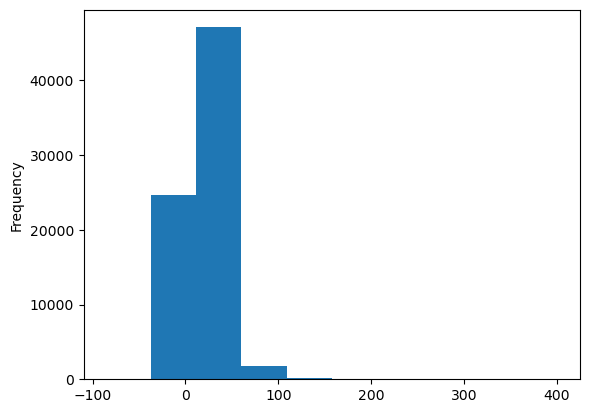

In [63]:
y.plot(kind='hist')
print(y.skew())
print(y.kurt())

<AxesSubplot:>

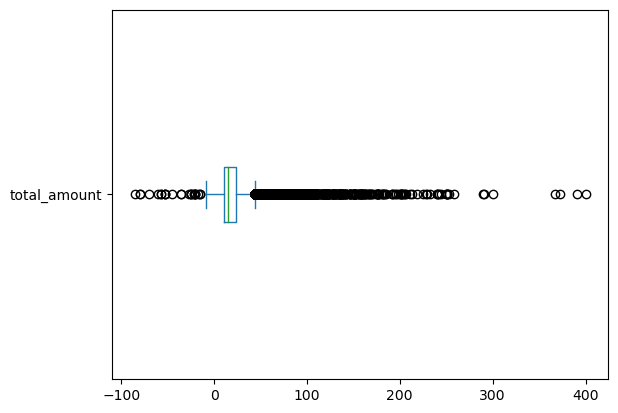

In [64]:
y.plot(kind='box',vert=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

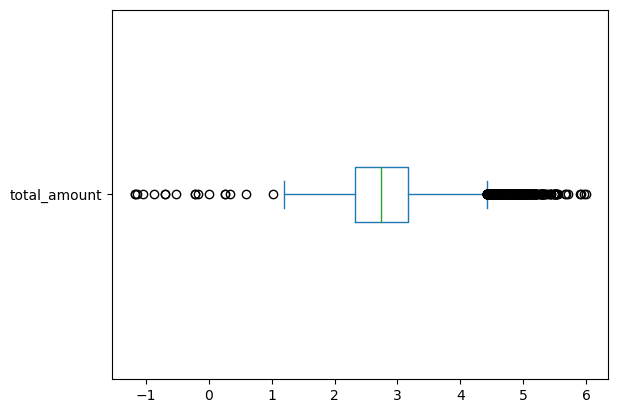

In [65]:
np.log(y).plot(kind='box',vert=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

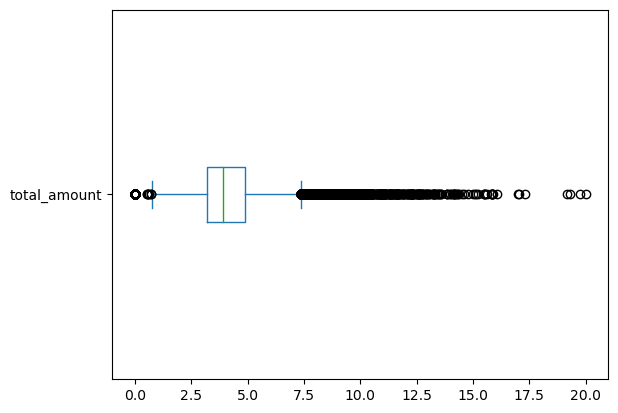

In [66]:
np.sqrt(y).plot(kind='box',vert=False)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
reg=LinearRegression()

In [69]:
regmodel=reg.fit(X,y)

In [70]:
regmodel.score(X,y)

0.48859092018480554

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree=DecisionTreeRegressor(max_depth=12)

In [79]:
treemodel=tree.fit(X,y)

In [80]:
treemodel.score(X,y)

0.8831012545970036

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val_score(tree,X,y)

array([ 0.71717014,  0.69728503,  0.72817622,  0.66666892, -1.74054998])

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
RF=RandomForestRegressor(n_estimators=3000)

In [85]:
RFmodel=RF.fit(X,y)

In [86]:
RFmodel.score(X,y)

0.9418101709742803